In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
data = pd.read_csv("D:\\customer_churn\\Bank Customer Churn Prediction.csv")


In [4]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


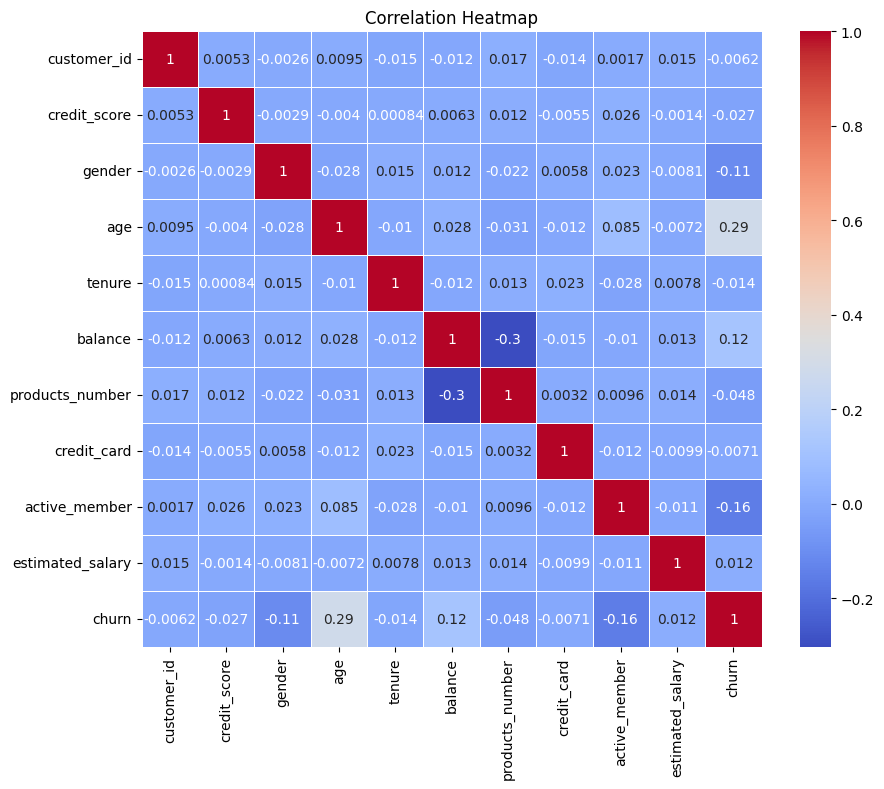

In [12]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
cors = numeric_data.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cors, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


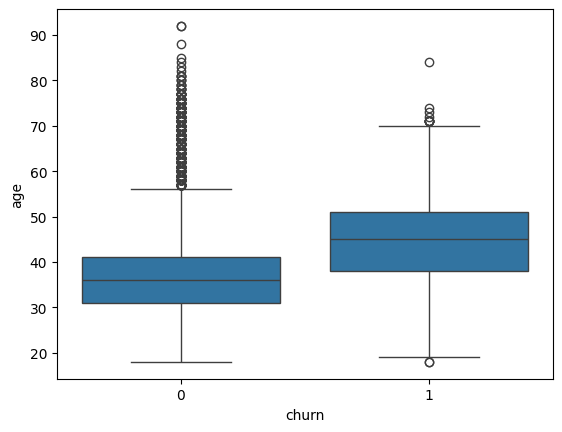

In [13]:
sns.boxplot(x="churn",y="age",data=data)
plt.show()

<Axes: xlabel='churn', ylabel='balance'>

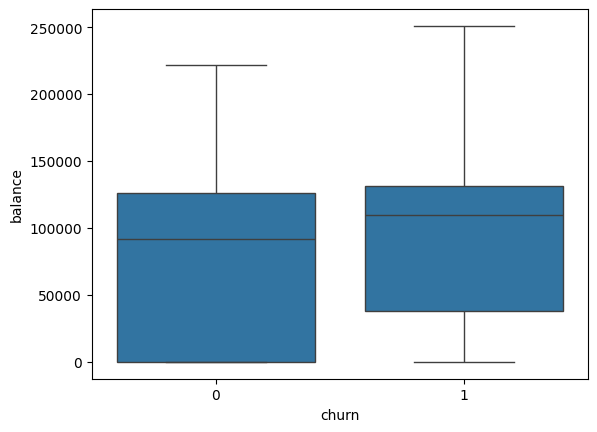

In [14]:
sns.boxplot(x="churn",y="balance",data=data)

<Axes: xlabel='churn', ylabel='credit_score'>

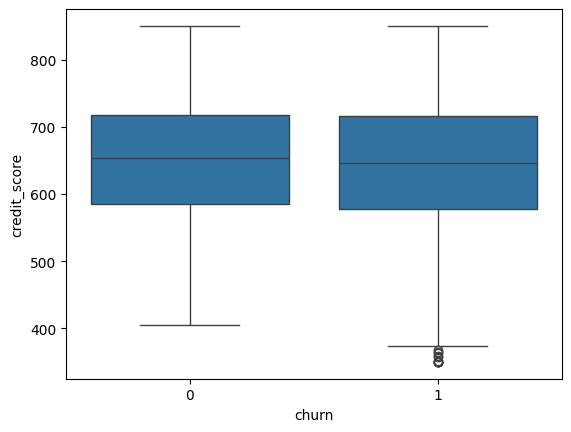

In [7]:
sns.boxplot(x="churn",y="credit_score",data=data)

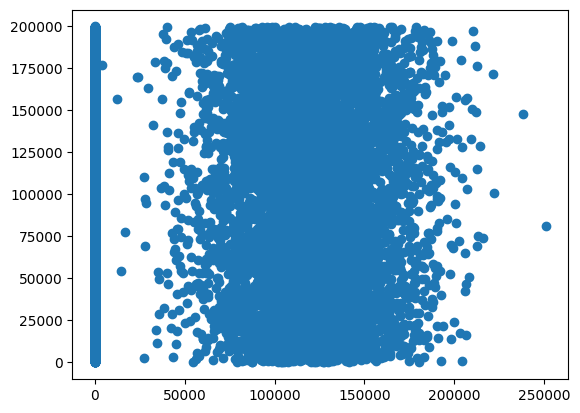

In [8]:
plt.scatter(data['balance'],data['estimated_salary'])

In [9]:
data["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['encoded']=encoder.fit_transform(data["gender"])
data[['churn','encoded']].head()

,churn,encoded
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [11]:
data['encoded'].value_counts()

encoded
1    5457
0    4543
Name: count, dtype: int64

In [12]:
m_values=5457
f_values=4543
m_churn,f_churn=0,0
for i in range(0,len(data)):
    if(data['churn'][i]==1 and data['encoded'][i]==1):
        m_churn+=1
    elif(data['churn'][i]==1 and data['encoded'][i]==0):
        f_churn+=1

In [15]:
x=[m_churn,f_churn]
print(x)

[898, 1139]


<BarContainer object of 2 artists>

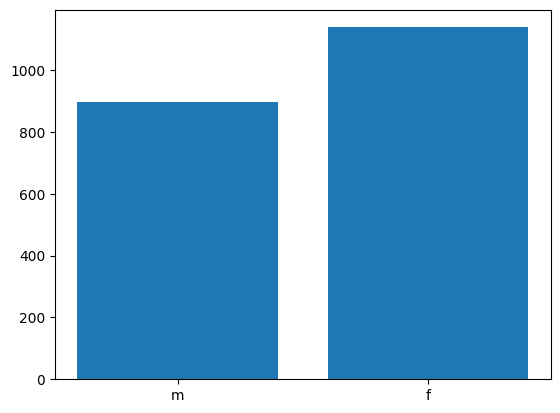

In [16]:

plt.bar(['m','f'],[m_churn,f_churn])

In [17]:
y=data['churn']
x=data[['age','credit_score','encoded','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

In [18]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x_tr)

StandardScaler()

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_tr,y_tr)
model.score(x_ts,y_ts)

c:\Users\mukun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.793

In [20]:
model.coef_
#x=data[['age','credit_score','encoded','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

array([[ 4.74395287e-02, -4.63955567e-03, -3.12400138e-02,
        -7.41618155e-02,  3.79294997e-06, -1.97945191e-02,
        -1.05008935e-02, -4.85491051e-02, -1.07668005e-06]])

In [21]:
#HYPERPARAMETER TUNING
from sklearn.pipeline import make_pipeline
test_score=[]
for lam in np.arange(0.01,100,0.1):
    pipe=make_pipeline(StandardScaler(),LogisticRegression(C=1/lam))
    pipe.fit(x_tr,y_tr)
    scores=pipe.score(x_ts,y_ts)
    test_score.append(scores)

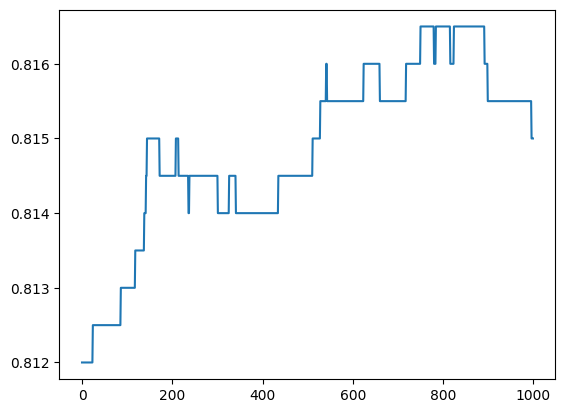

In [22]:
plt.plot(test_score)

In [23]:
np.argmax(test_score)

750

In [24]:
x_tr.head()


,age,credit_score,encoded,tenure,balance,products_number,credit_card,active_member,estimated_salary
4803,41,802,1,5,0.00,2,1,1,134626.30
7230,37,670,1,2,0.00,2,1,1,54229.74
2335,48,724,0,6,110463.25,2,1,1,80552.11
369,29,593,0,2,152265.43,1,1,0,34004.44
3097,30,476,1,3,134366.42,1,1,0,68343.53


In [25]:
l_best=0.01*624*0.1

In [27]:
import pickle
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model, f)
